In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.utils import shuffle
from scipy.stats import zscore
from sklearn.decomposition import PCA
from scipy.stats import gaussian_kde


import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('Zoo.csv')
data = data.dropna()
data = data.drop(['animal name'], axis=1)

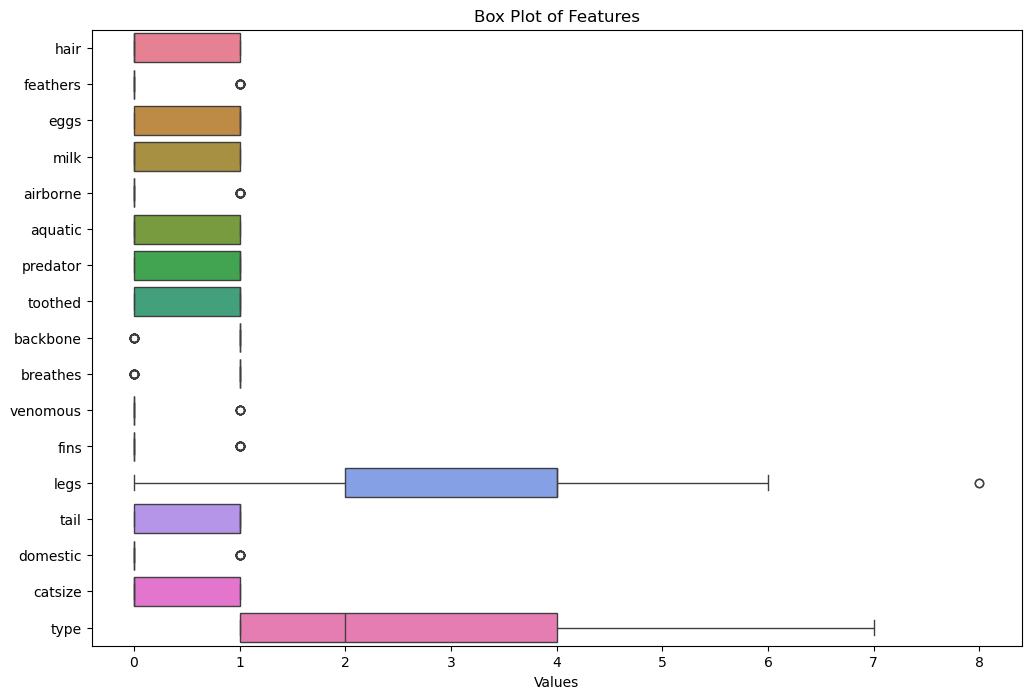

In [2]:
# Create box plots to visualize feature distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title('Box Plot of Features')
plt.xlabel('Values')
plt.show()

In [3]:
z_scores = zscore(data)

abs_z_scores = np.abs(z_scores)

threshold = 3

# Boolean array indicating outliers
outlier_mask = (abs_z_scores > threshold).any(axis=1)

# Remove outliers
data_cleaned = data[~outlier_mask]

# Display the shape of the original and cleaned datasets
print("Original Data Shape:", data.shape)
print("Cleaned Data Shape:", data_cleaned.shape)

data = data_cleaned

Original Data Shape: (101, 17)
Cleaned Data Shape: (93, 17)


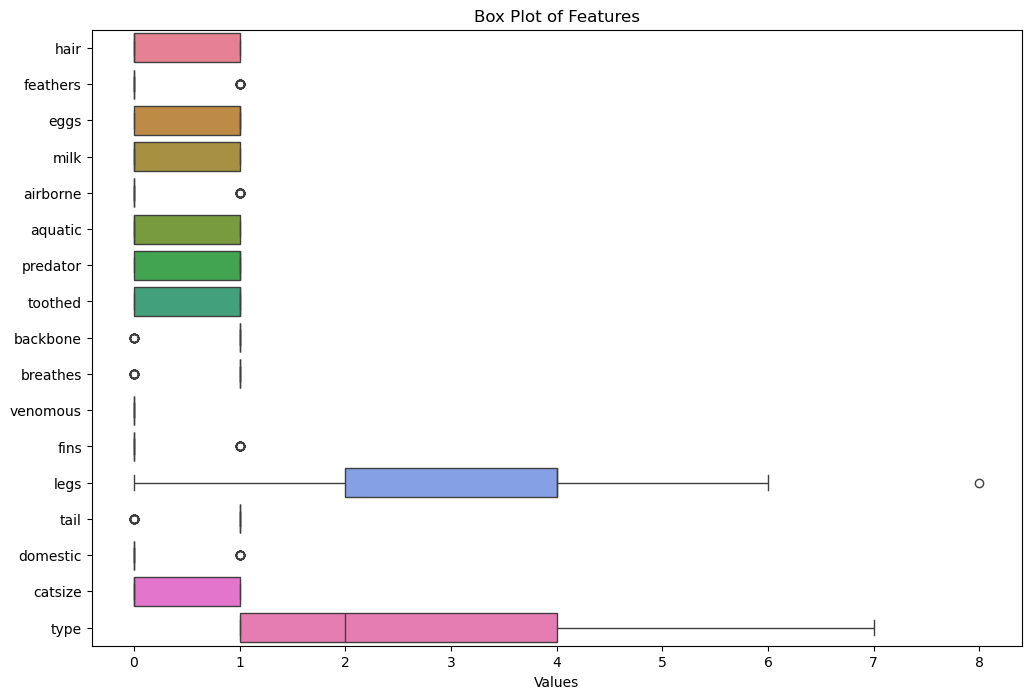

In [4]:
# Create box plots to visualize feature distributions
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, orient="h")
plt.title('Box Plot of Features')
plt.xlabel('Values')
plt.show()

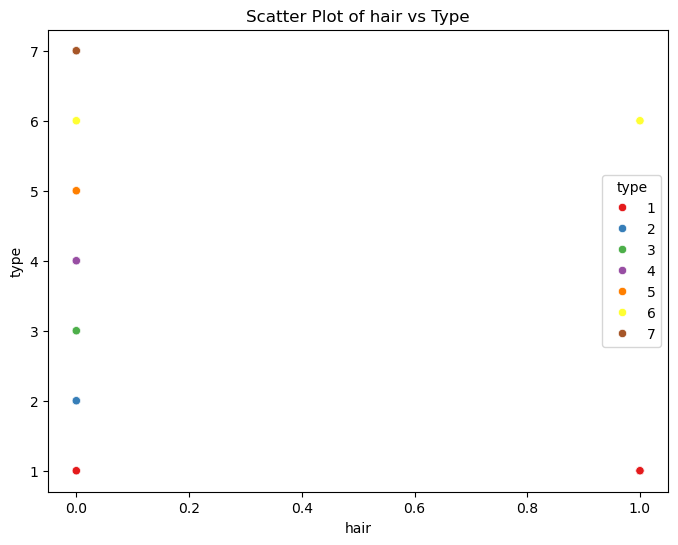

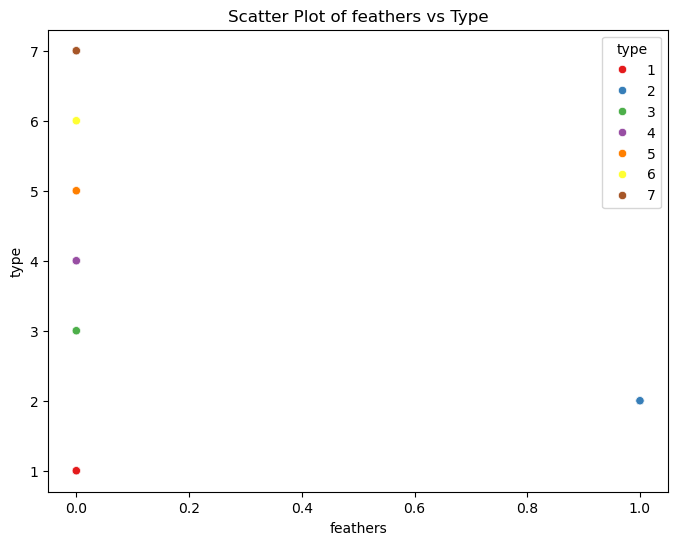

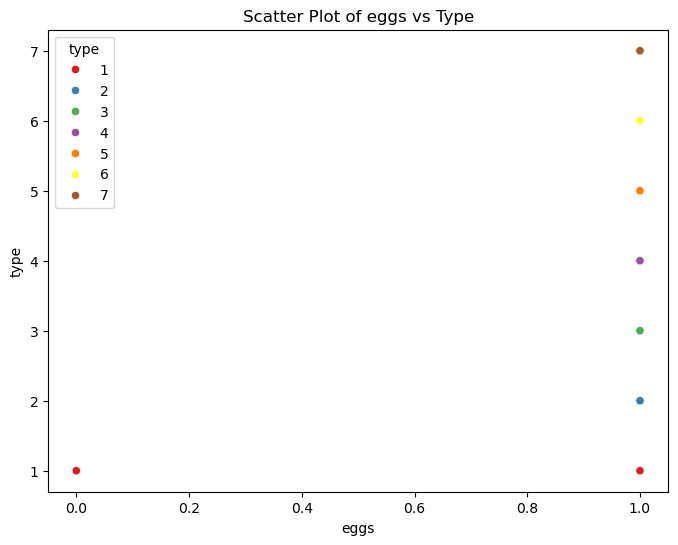

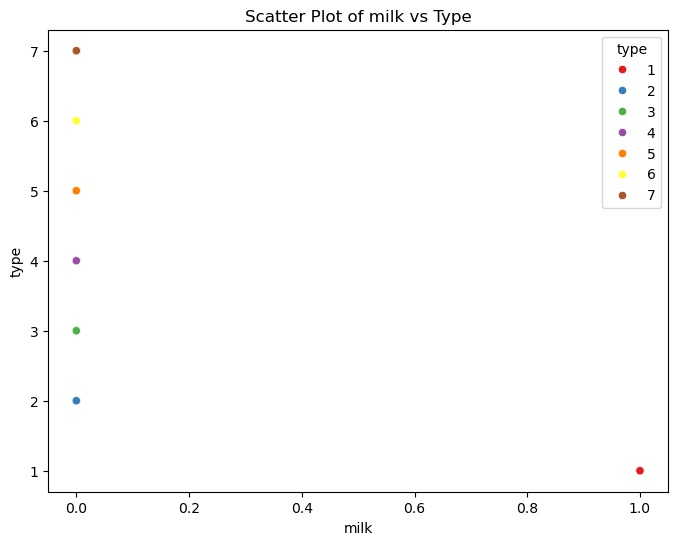

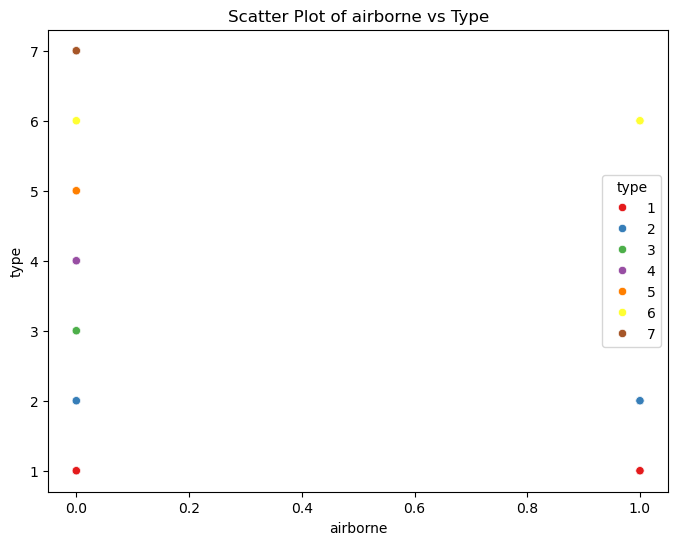

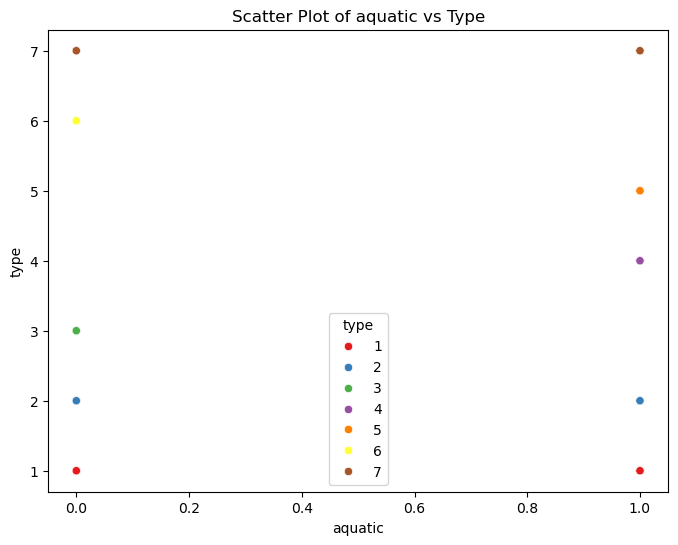

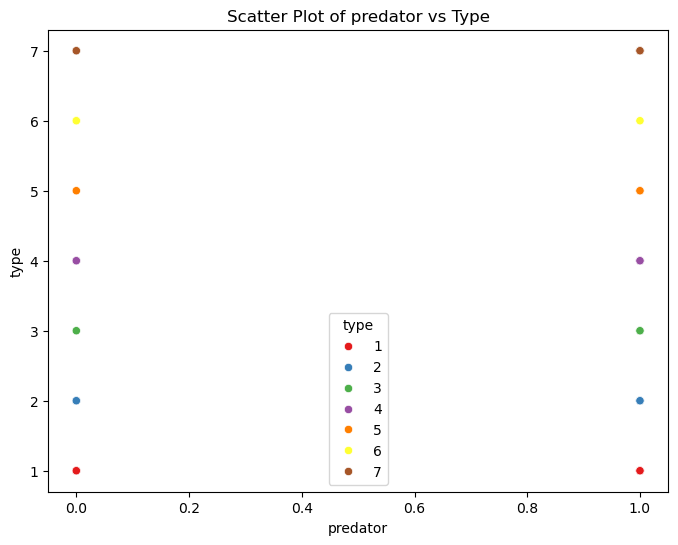

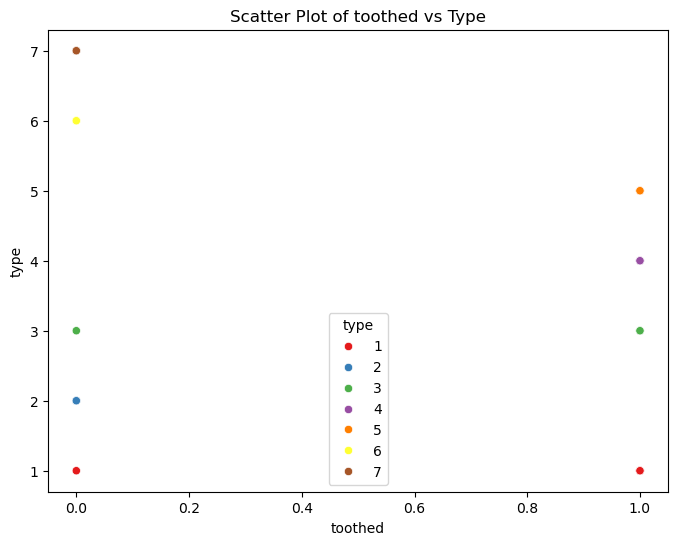

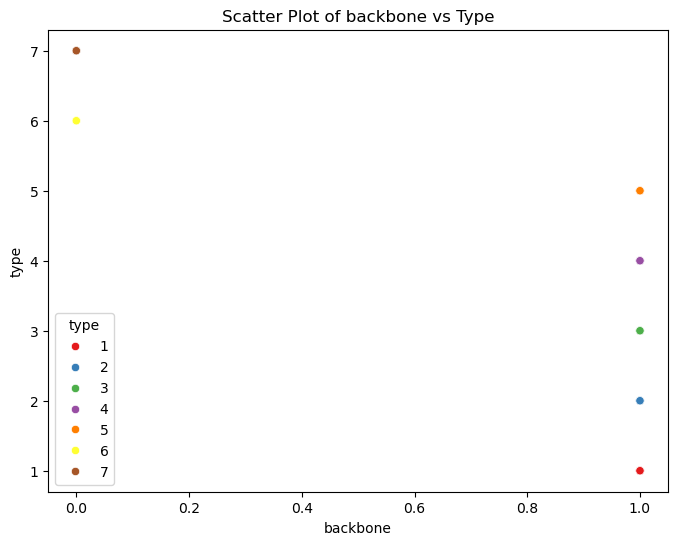

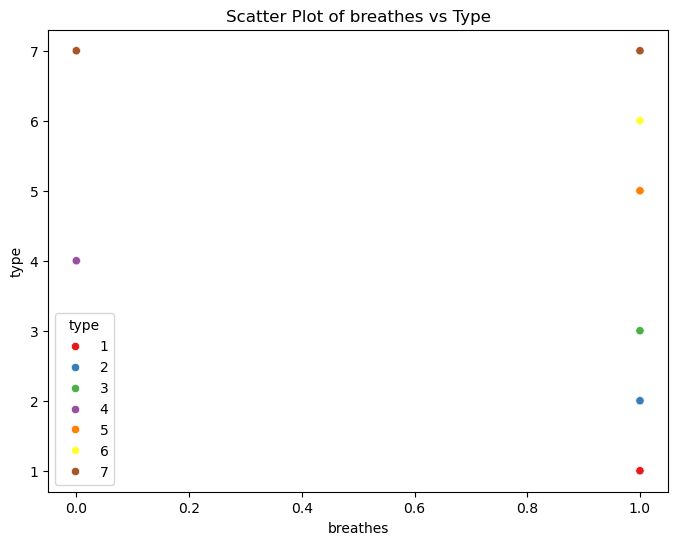

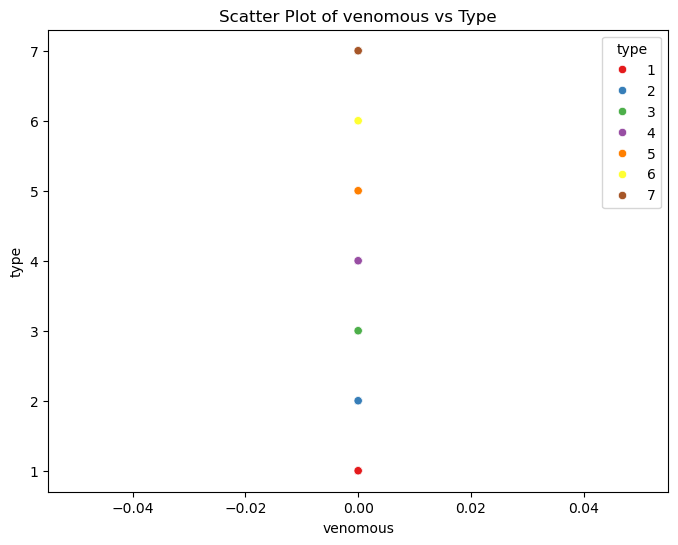

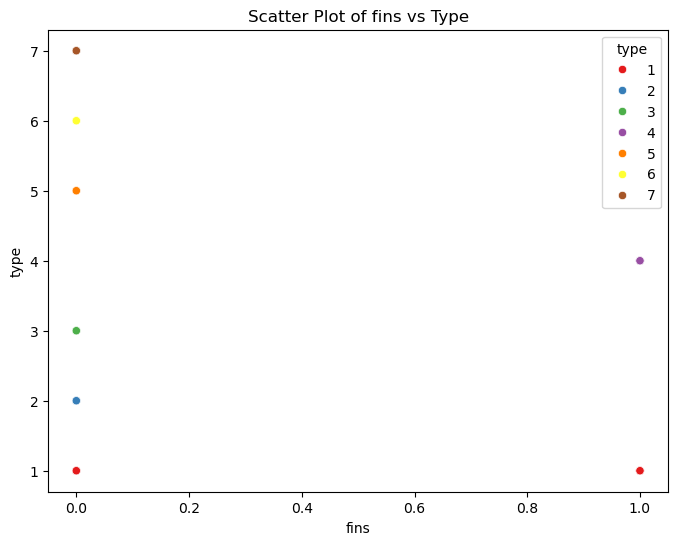

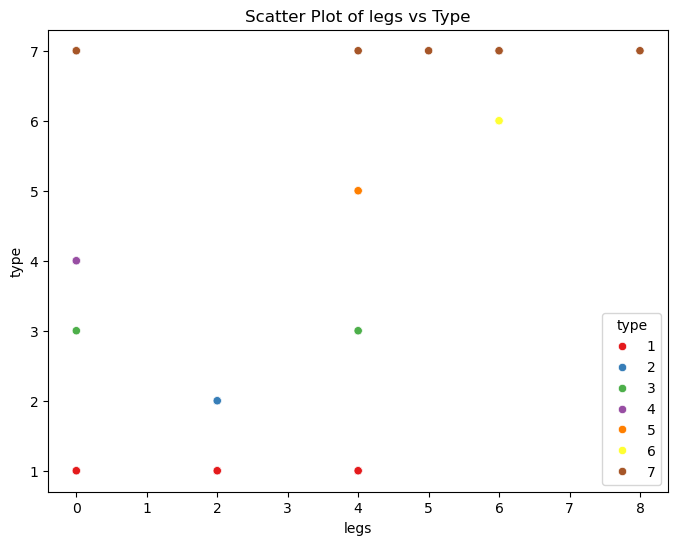

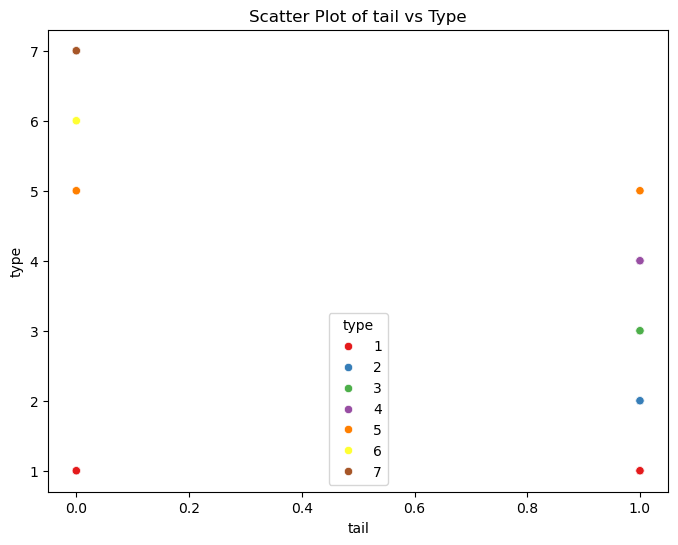

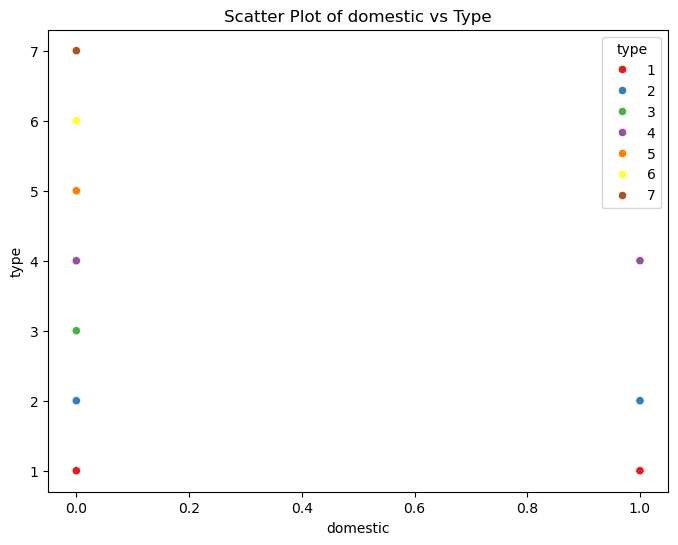

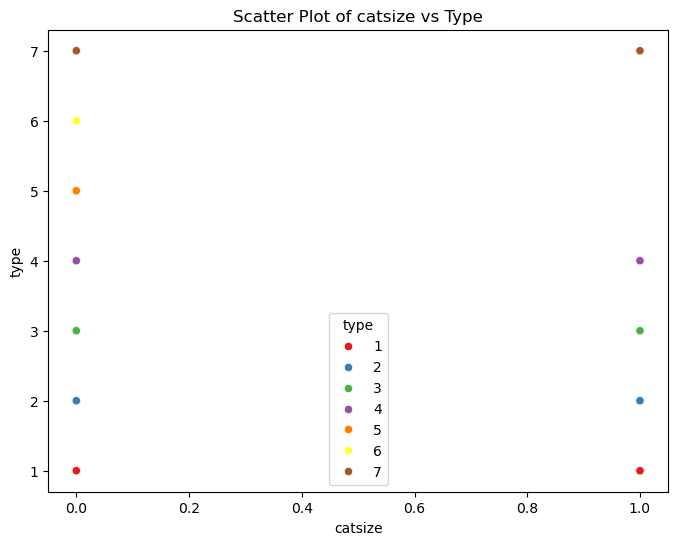

In [5]:
for column in data.columns[:-1]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=data, x=column, y="type", hue="type", palette="Set1", legend=True)
    plt.title(f'Scatter Plot of {column} vs Type')
    plt.xlabel(column)
    plt.ylabel("type")
    plt.show()

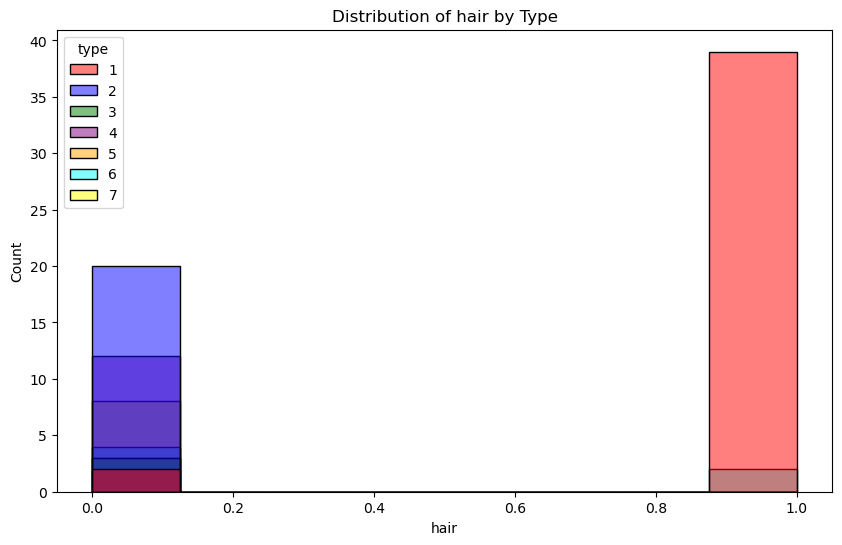

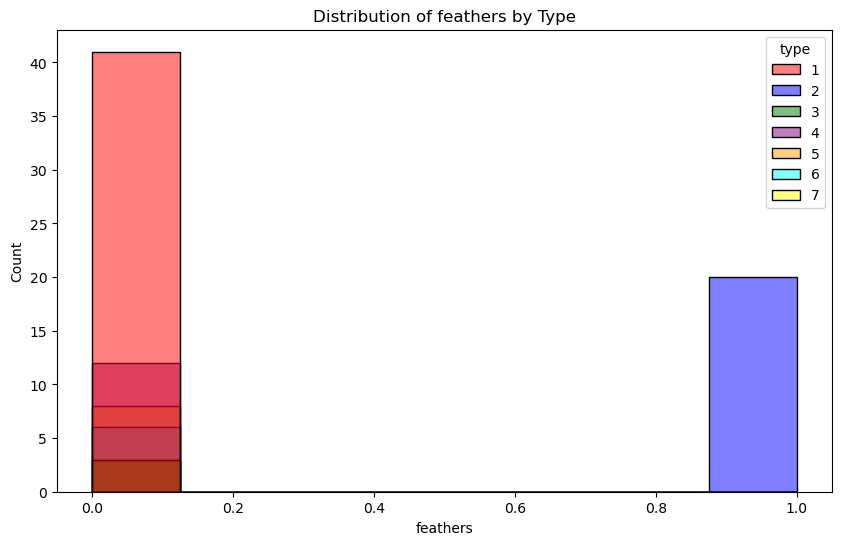

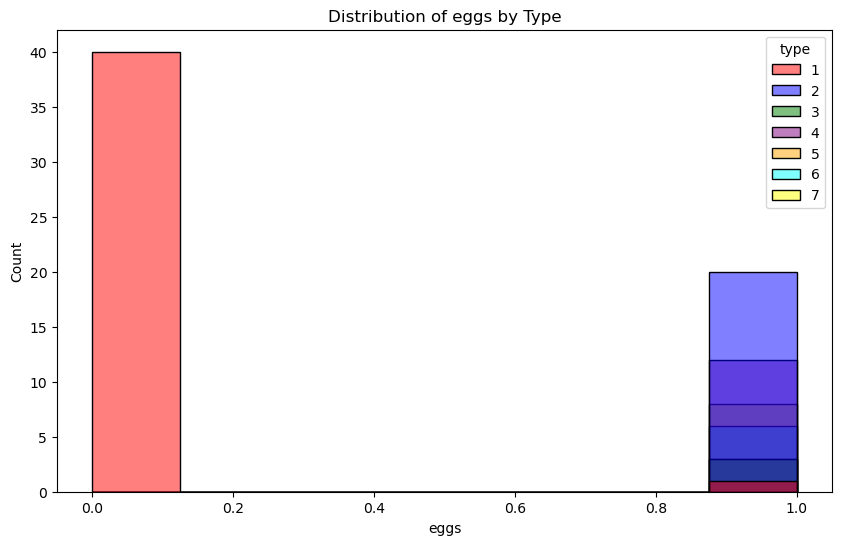

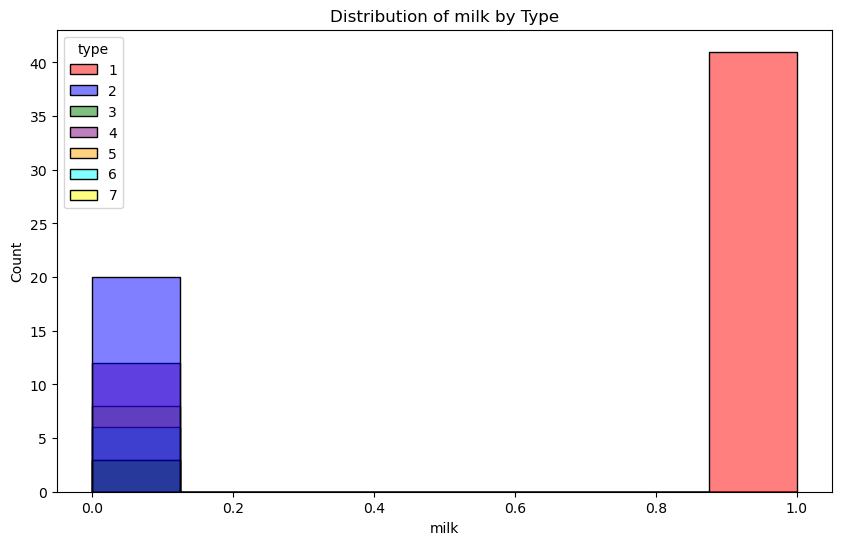

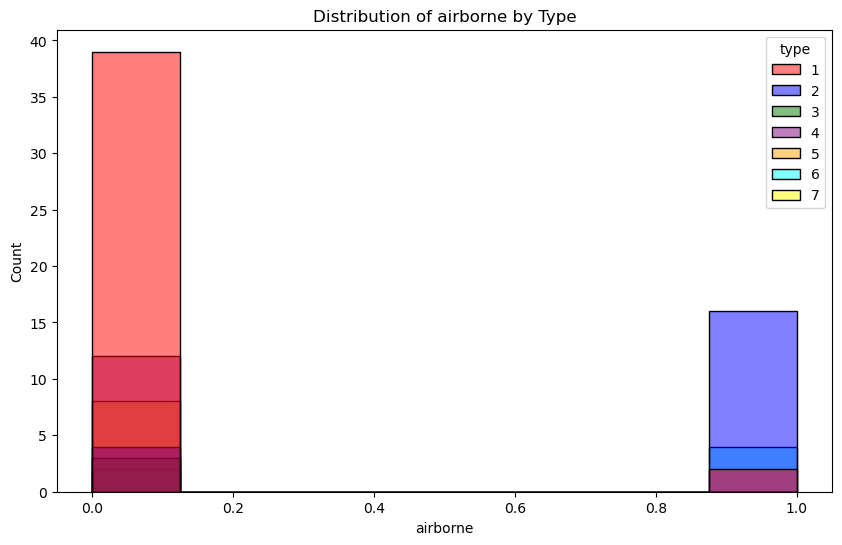

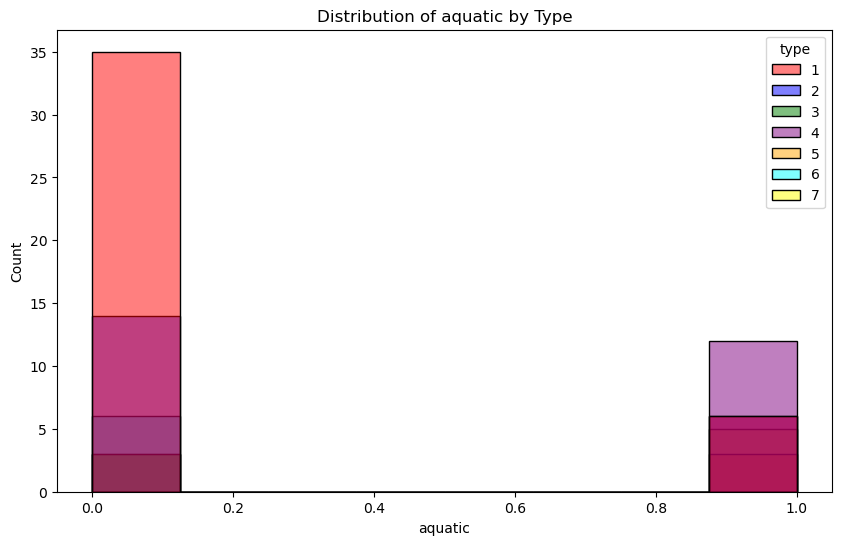

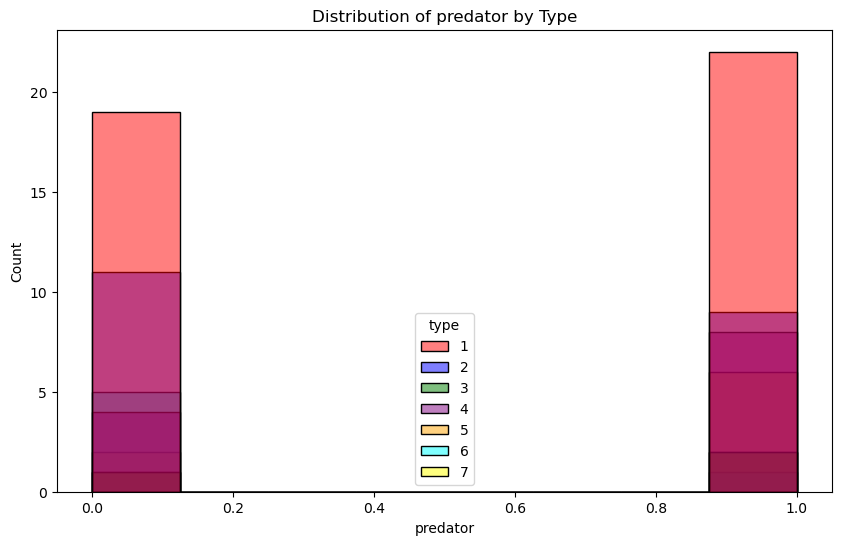

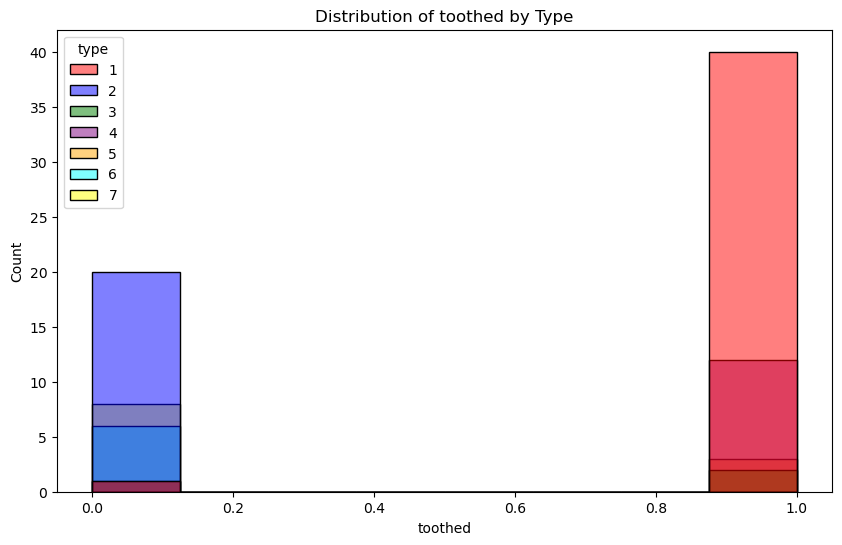

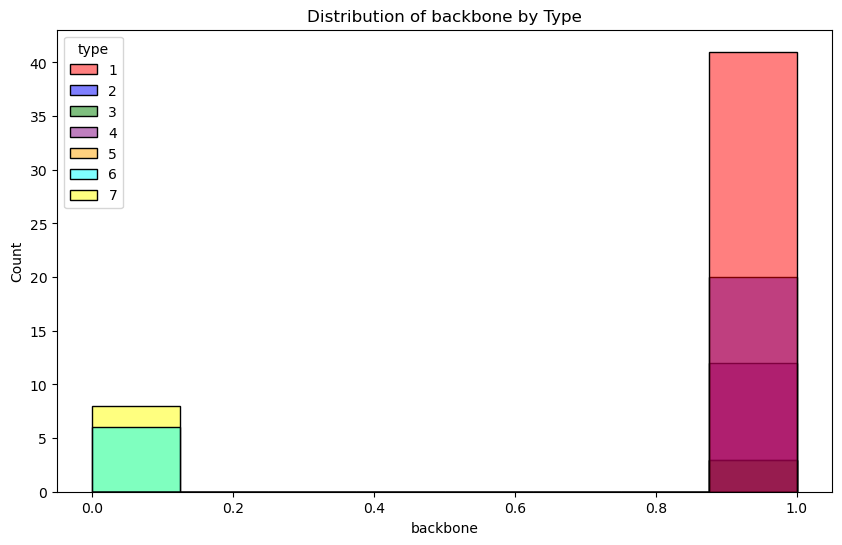

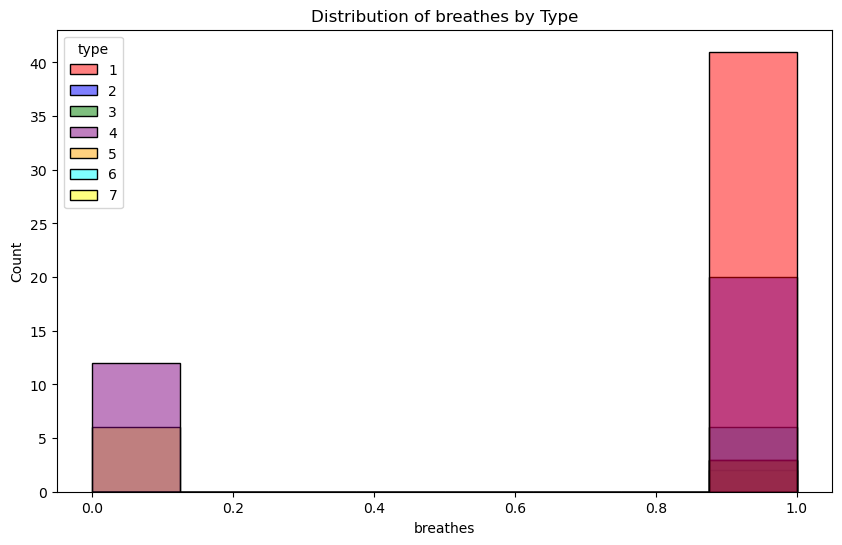

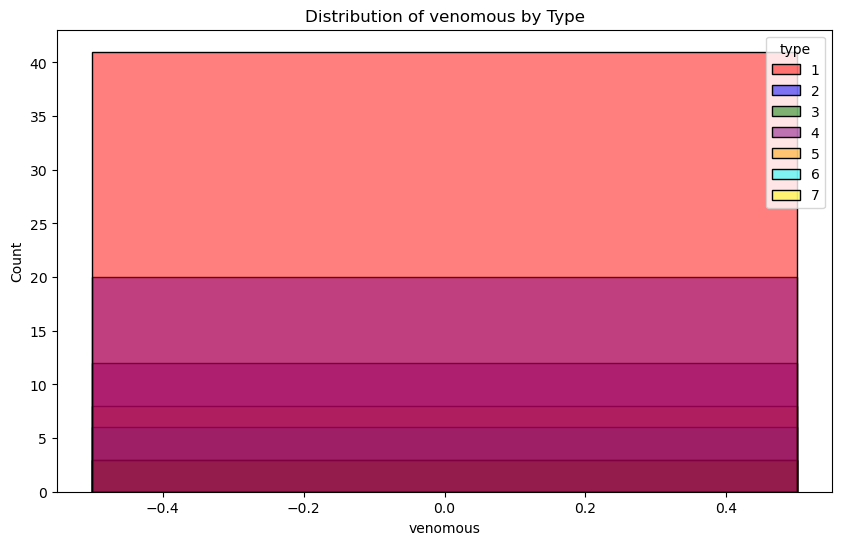

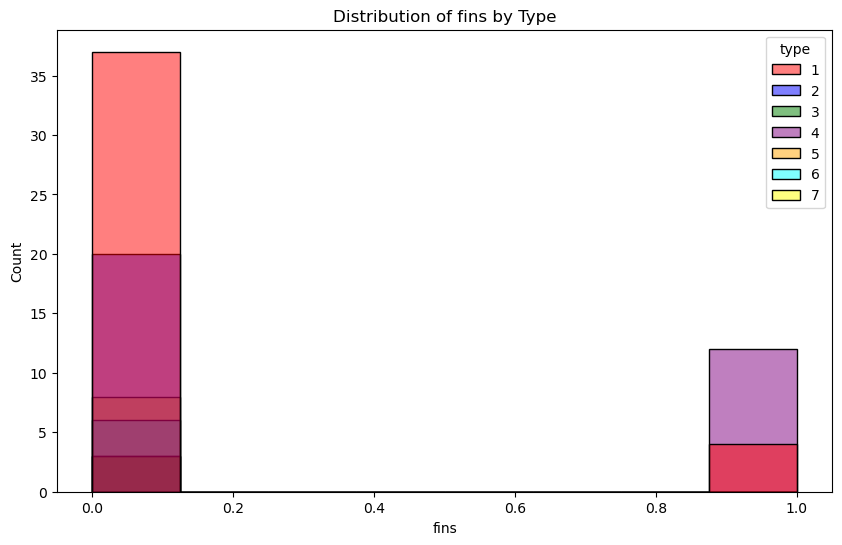

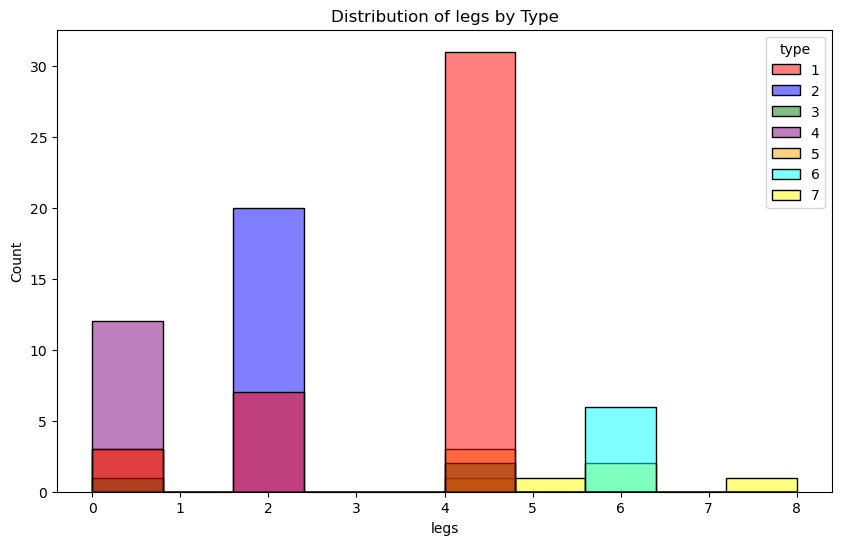

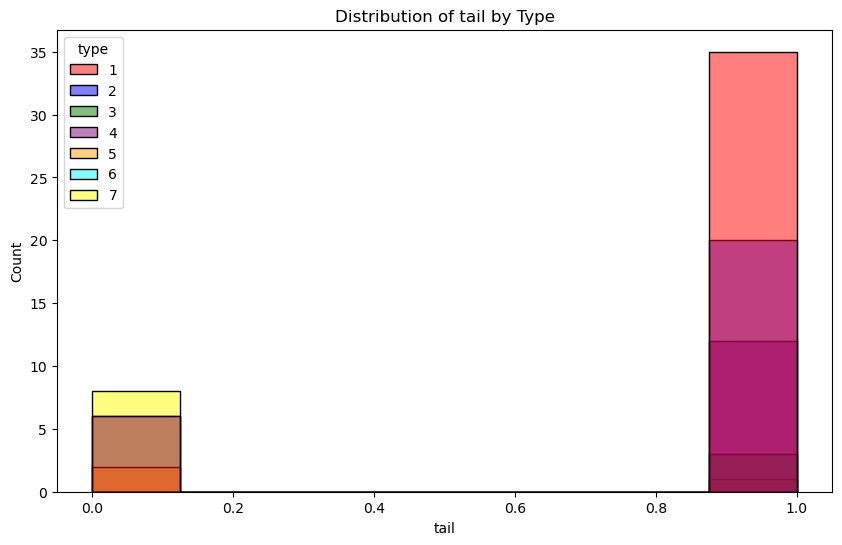

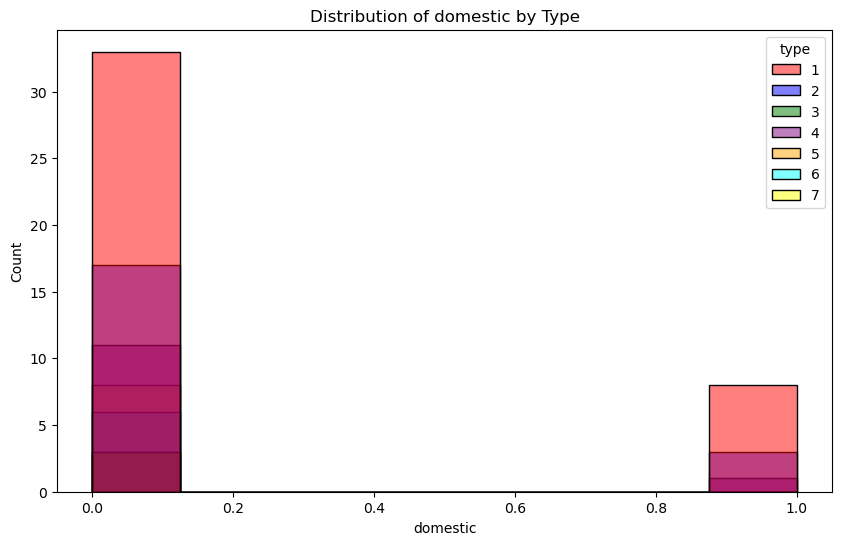

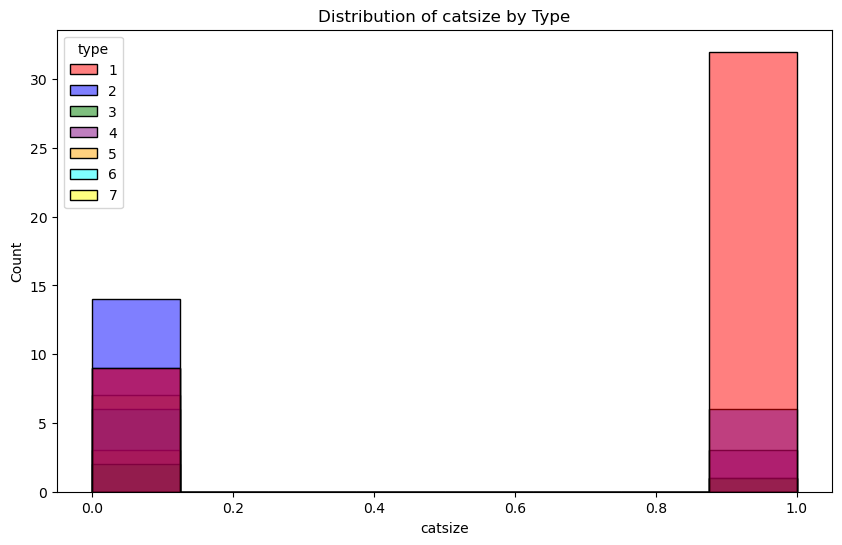

In [6]:
custom_colors = {1: 'red', 2: 'blue', 3: 'green', 4: 'purple', 5: 'orange', 6: 'cyan', 7: 'yellow'}
for feature in data.columns[:-1]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=feature, hue='type', palette=custom_colors, kde=False, legend=True)
    plt.title(f'Distribution of {feature} by Type')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

In [7]:
# Data Pre-processing

# Shuffle the dataset
data = shuffle(data, random_state=42)

# Separate features (X) and target variable (y)
X = data.drop(['type'], axis=1)
y = data['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Define parameters to iterate over
ks = [3, 5, 7] 
weights = ['uniform', 'distance']
metrics = ['minkowski', 'euclidean', 'manhattan']

best_params = None
best_accuracy = 0

# Iterate through different combinations of parameters
for k in ks:
    for weight in weights:
        for metric in metrics:
            # Initialize the KNN classifier
            knn_classifier = KNeighborsClassifier(n_neighbors=k, weights=weight, metric=metric)

            # Train the model
            knn_classifier.fit(X_train_scaled, y_train)

            # Make predictions on the test set
            y_pred = knn_classifier.predict(X_test_scaled)

            # Evaluate the model
            accuracy = accuracy_score(y_test, y_pred)
            conf_matrix = confusion_matrix(y_test, y_pred)
            classification_rep = classification_report(y_test, y_pred)

            # Display the results
            print("Parameters: k={}, weight={}, metric={}".format(k, weight, metric))
            print(f'Accuracy: {accuracy}')
            print()
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'k': k, 'weight': weight, 'metric': metric}

Parameters: k=3, weight=uniform, metric=minkowski
Accuracy: 0.8947368421052632

Parameters: k=3, weight=uniform, metric=euclidean
Accuracy: 0.8947368421052632

Parameters: k=3, weight=uniform, metric=manhattan
Accuracy: 0.8947368421052632

Parameters: k=3, weight=distance, metric=minkowski
Accuracy: 1.0

Parameters: k=3, weight=distance, metric=euclidean
Accuracy: 1.0

Parameters: k=3, weight=distance, metric=manhattan
Accuracy: 1.0

Parameters: k=5, weight=uniform, metric=minkowski
Accuracy: 0.8947368421052632

Parameters: k=5, weight=uniform, metric=euclidean
Accuracy: 0.8947368421052632

Parameters: k=5, weight=uniform, metric=manhattan
Accuracy: 0.8947368421052632

Parameters: k=5, weight=distance, metric=minkowski
Accuracy: 0.9473684210526315

Parameters: k=5, weight=distance, metric=euclidean
Accuracy: 0.9473684210526315

Parameters: k=5, weight=distance, metric=manhattan
Accuracy: 1.0

Parameters: k=7, weight=uniform, metric=minkowski
Accuracy: 0.8421052631578947

Parameters: k=

In [9]:
print("Best parameters : ", best_params)
print("Best Accuracy : ", best_accuracy)

Best parameters :  {'k': 3, 'weight': 'distance', 'metric': 'minkowski'}
Best Accuracy :  1.0


In [10]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='minkowski')

# Train the model
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying the results
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)

Accuracy: 1.0

Confusion Matrix:
[[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 2]]

Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



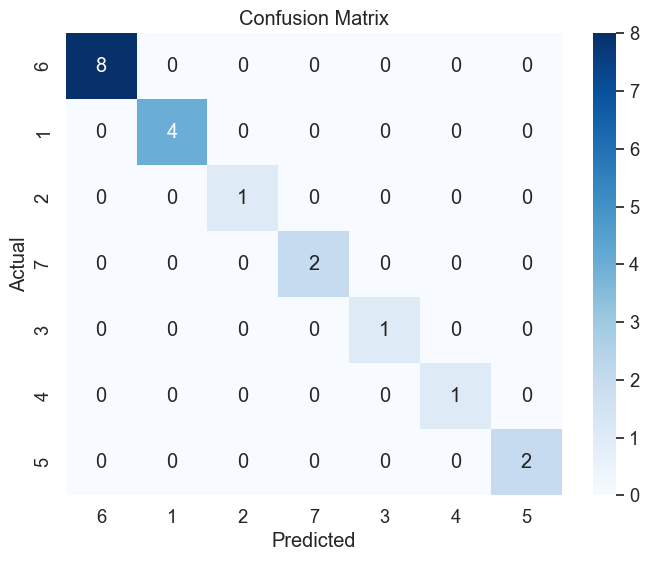

In [11]:
# Confusion Matrix Visualization
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data['type'].unique(), yticklabels=data['type'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()